In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:

# Tworzenie klasy Modeli ktora zawiera nn.Module
class Model2(nn.Module):
  #input layer(30) 2x hidden layer(8) output layer(2)
  def __init__(self, in_features=30, h1=8, h2=8, out_features=2):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [37]:
df = pd.read_csv('cancer.csv')
df = df[[col for col in df.columns if col != 'diagnosis(1=m, 0=b)'] + ['diagnosis(1=m, 0=b)']]
df.rename(columns={'diagnosis(1=m, 0=b)': 'output'}, inplace=True)

In [38]:
model2 = Model2()
torch.manual_seed(420213769)
X_cancer = df.drop('output', axis=1)
y_cancer = df['output']
X_cancer = X_cancer.values
y_cancer = y_cancer.values
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer,y_cancer,test_size = 0.2, random_state = 420213769)

X_cancer_train = torch.FloatTensor(X_cancer_train)
X_cancer_test = torch.FloatTensor(X_cancer_test)
y_cancer_train = torch.LongTensor(y_cancer_train)
y_cancer_test = torch.LongTensor(y_cancer_test)
# Criterion (loss)
criterion = nn.CrossEntropyLoss()
# Optimizer = Adam, lr
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)


In [39]:
# Train our model
epochs = 5000
losses = []
accuracies = []
for i in range(epochs):
  #Go foward
  y_cancer_pred = model2.forward(X_cancer_train)

  #mierznie lossa
  loss = criterion(y_cancer_pred, y_cancer_train)
  losses.append(loss.detach().numpy())
  #mierzenie dokladnosci
  _, predicted = torch.max(y_cancer_pred, 1)
  correct = (predicted == y_cancer_train).sum().item()
  accuracy = correct / y_cancer_train.size(0)
  accuracies.append(accuracy)

  if i % 100 == 0:
    print(f'epochs: {i} and loss: {loss}Accuracy: {accuracy}')
  #backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



epochs: 0 and loss: 1.3787899017333984Accuracy: 0.37142857142857144
epochs: 100 and loss: 0.2592024505138397Accuracy: 0.9098901098901099
epochs: 200 and loss: 0.21864302456378937Accuracy: 0.9142857142857143
epochs: 300 and loss: 0.20401598513126373Accuracy: 0.9208791208791208
epochs: 400 and loss: 0.19366759061813354Accuracy: 0.9230769230769231
epochs: 500 and loss: 0.1842813640832901Accuracy: 0.9230769230769231
epochs: 600 and loss: 0.17549647390842438Accuracy: 0.9274725274725275
epochs: 700 and loss: 0.1673281043767929Accuracy: 0.9340659340659341
epochs: 800 and loss: 0.1597912758588791Accuracy: 0.9318681318681319
epochs: 900 and loss: 0.1525183916091919Accuracy: 0.9340659340659341
epochs: 1000 and loss: 0.1447092890739441Accuracy: 0.9362637362637363
epochs: 1100 and loss: 0.1354854553937912Accuracy: 0.9406593406593406
epochs: 1200 and loss: 0.12419187277555466Accuracy: 0.9428571428571428
epochs: 1300 and loss: 0.11200373619794846Accuracy: 0.9472527472527472
epochs: 1400 and loss: 0.

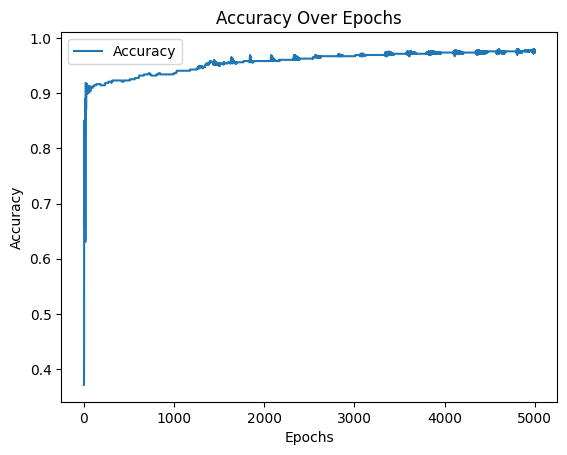

In [40]:
plt.plot(range(epochs), accuracies, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

Text(0.5, 0, 'epoch')

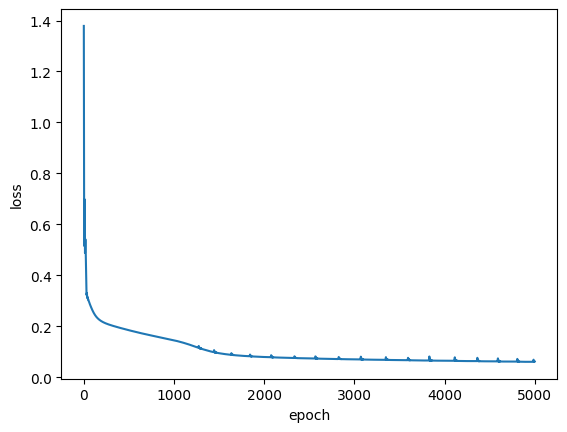

In [41]:
plt.plot(range(epochs),losses)
plt.ylabel("loss")
plt.xlabel("epoch")

In [42]:
with torch.no_grad(): #turn off back prop
  y_cancer_eval = model2.forward(X_cancer_test) # testowanko
  loss = criterion(y_cancer_eval, y_cancer_test)

In [43]:
loss

tensor(0.1042)

In [44]:
correct = 0
count = 0
with torch.no_grad():
  for i, data in enumerate(X_cancer_test):
    y_val = model2.forward(data)



    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_cancer_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_cancer_test[i]:
      correct +=1
    count +=1

print(f'We got {correct}/{count} correct!')

1.)  tensor([-25.7229, -12.1771]) 	 1 	 1
2.)  tensor([ -7.6617, -14.1476]) 	 0 	 0
3.)  tensor([ -3.3222, -13.8324]) 	 0 	 0
4.)  tensor([ -9.1109, -11.1128]) 	 0 	 0
5.)  tensor([-20.7861, -13.0979]) 	 1 	 1
6.)  tensor([-45.9482, -13.2781]) 	 1 	 1
7.)  tensor([-19.2422, -12.4258]) 	 1 	 1
8.)  tensor([-69.9729,  -8.0452]) 	 1 	 1
9.)  tensor([ -5.8308, -14.8945]) 	 0 	 0
10.)  tensor([-37.9097,  -6.9055]) 	 1 	 1
11.)  tensor([ -5.8887, -13.5569]) 	 0 	 0
12.)  tensor([ -5.6738, -11.5901]) 	 0 	 0
13.)  tensor([-52.5867,  -9.7165]) 	 1 	 1
14.)  tensor([ -8.4653, -13.6696]) 	 0 	 0
15.)  tensor([-26.4893,  -9.9426]) 	 1 	 1
16.)  tensor([ -7.7191, -12.3259]) 	 0 	 0
17.)  tensor([-16.8201,  -6.4563]) 	 1 	 1
18.)  tensor([ -6.3179, -12.7281]) 	 0 	 0
19.)  tensor([-10.6771, -17.6760]) 	 0 	 0
20.)  tensor([ -3.3015, -12.0262]) 	 0 	 0
21.)  tensor([ -5.5560, -14.6767]) 	 0 	 0
22.)  tensor([ -4.5223, -12.0934]) 	 0 	 0
23.)  tensor([-16.3860,  -7.8913]) 	 1 	 1
24.)  tensor([-27.90